Aim: Implementing and Comparing Clustering Algorithms on Real-World Datasets.

Description:

Hierarchical clustering:

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. It is particularly useful for analyzing datasets where the number of clusters is not predefined. This technique produces a tree-like structure called a dendrogram, which visually represents the nested grouping of data points and their similarity levels.


K-Means:

K-Means is a popular and efficient clustering algorithm used to partition data into a predefined number of clusters (kkk). It works by grouping similar data points together while minimizing intra-cluster variability. Unlike hierarchical clustering, K-Means requires the number of clusters (kkk) to be specified beforehand.


DBSCAN:

DBSCAN is a density-based clustering algorithm that groups data points into clusters based on their density and identifies outliers as points that lie in low-density regions. It does not require the number of clusters (kkk) to be specified beforehand, making it particularly useful for datasets with irregularly shaped clusters.


2D PCA (Principal Component Analysis):
2D PCA refers to applying Principal Component Analysis to reduce a dataset's dimensionality to two dimensions. This is particularly useful for visualizing high-dimensional data in a 2D space while retaining as much of the data's variability as possible.


t-SNE (t-Distributed Stochastic Neighbor Embedding):
t-SNE is a nonlinear dimensionality reduction technique primarily used for visualizing high-dimensional data in 2D or 3D. It is particularly effective at preserving local structures in the data, making it a popular choice for identifying clusters and patterns.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/household_power_consumption.csv")

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,8


In [ ]:
df['Sub_metering_3'].describe()

,Sub_metering_3
count,99992.000000
mean,7.518561
std,8.668072
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [ ]:
df["Sub_metering_3"].value_counts()

,count
Sub_metering_3,
0.0,56853
18.0,20723
17.0,18940
19.0,1546
16.0,1484
9.0,45
15.0,40
4.0,38
13.0,36


In [ ]:
df.fillna(df["Sub_metering_3"].mean(), inplace = True)
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         100000 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [ ]:
import numpy as np

df = df.replace('?', np.nan)

try:
  df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
  df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])
  df['Voltage'] = pd.to_numeric(df['Voltage'])
  df['Global_intensity'] = pd.to_numeric(df['Global_intensity'])
  df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'])
  df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'])
except:
  pass

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Date       | Time     | Global_active_power   | Global_reactive_power   | Voltage   | Global_intensity   | Sub_metering_1   | Sub_metering_2   | Sub_metering_3   |
|:-----------|:---------|:----------------------|:------------------------|:----------|:-------------------|:-----------------|:-----------------|:-----------------|
| 16/12/2006 | 17:24:00 | 4.216                 | 0.418                   | 234.84    | 18.4               | 0                | 1                | 17               |
| 16/12/2006 | 17:25:00 | 5.36                  | 0.436                   | 233.63    | 23                 | 0                | 1                | 16               |
| 16/12/2006 | 17:26:00 | 5.374                 | 0.498                   | 233.29    | 23                 | 0                | 2                | 17               |
| 16/12/2006 | 17:27:00 | 5.388                 | 0.502                   | 233.74    | 23                 | 0                | 1                | 17               |
| 16

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    99992 non-null   float64
 3   Global_reactive_power  99992 non-null   float64
 4   Voltage                99992 non-null   float64
 5   Global_intensity       99992 non-null   float64
 6   Sub_metering_1         99992 non-null   float64
 7   Sub_metering_2         99992 non-null   float64
 8   Sub_metering_3         100000 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.9+ MB


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
df.info()

| Date       | Time     | Global_active_power   | Global_reactive_power   | Voltage   | Global_intensity   | Sub_metering_1   | Sub_metering_2   | Sub_metering_3   |
|:-----------|:---------|:----------------------|:------------------------|:----------|:-------------------|:-----------------|:-----------------|:-----------------|
| 16/12/2006 | 17:24:00 | 0.436415              | 0.478261                | 0.40234   | 0.429268           | 0                | 0.0128205        | 17               |
| 16/12/2006 | 17:25:00 | 0.560547              | 0.498856                | 0.359447  | 0.541463           | 0                | 0.0128205        | 16               |
| 16/12/2006 | 17:26:00 | 0.562066              | 0.569794                | 0.347395  | 0.541463           | 0                | 0.025641         | 17               |
| 16/12/2006 | 17:27:00 | 0.563585              | 0.574371                | 0.363346  | 0.541463           | 0                | 0.0128205        | 17               |
| 16

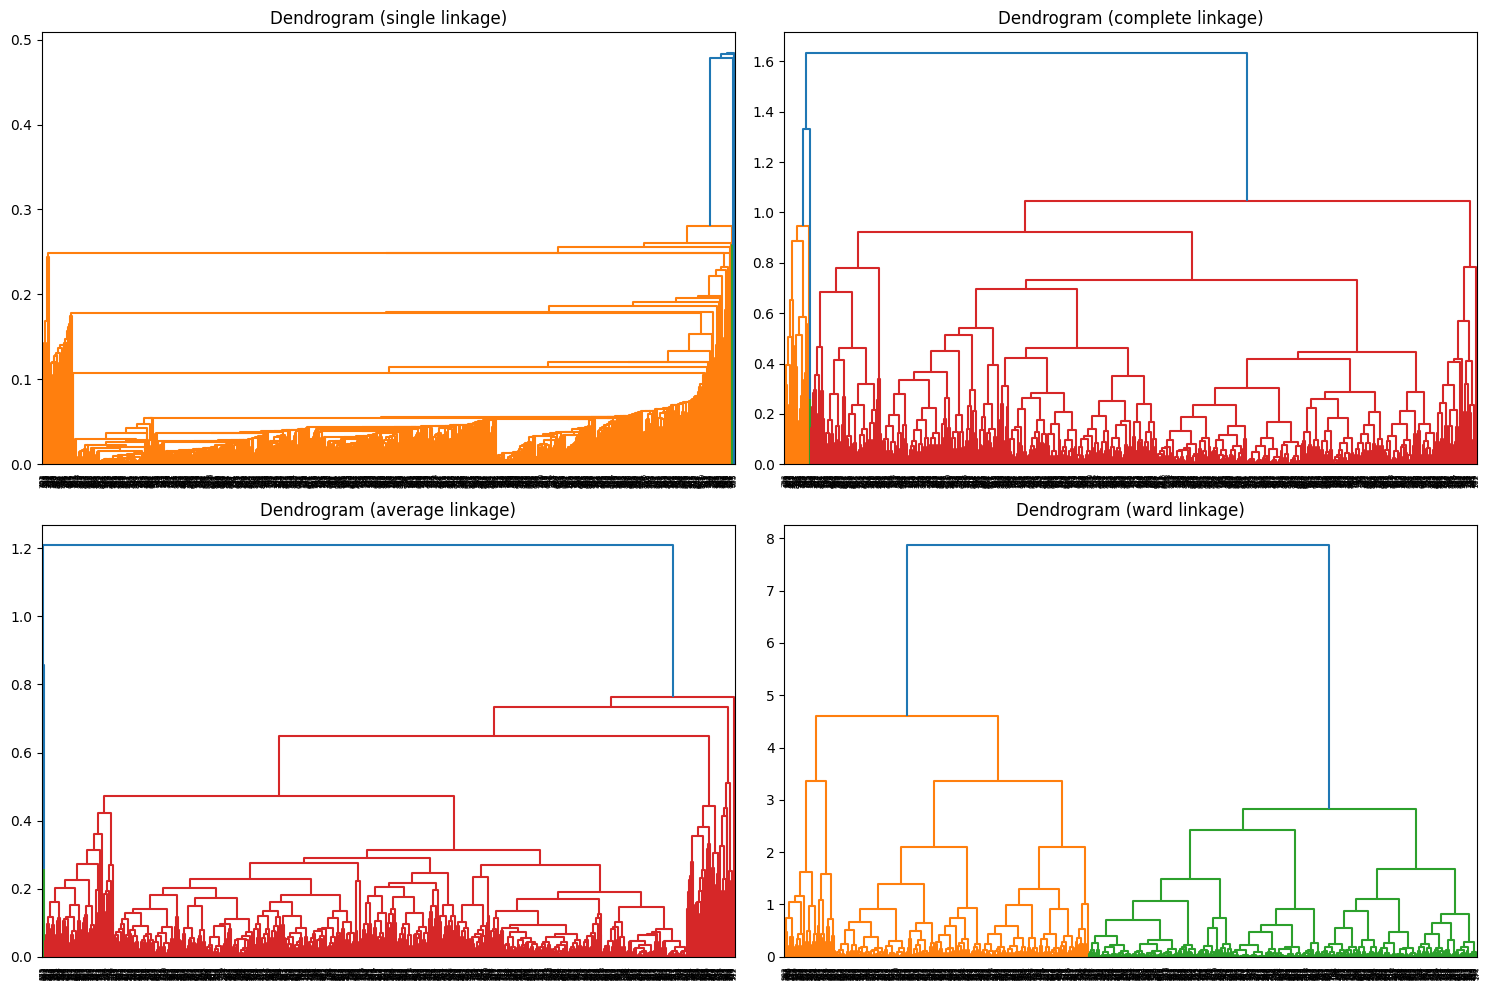

In [ ]:


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42)

cols_for_clustering = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
X = df_sample[cols_for_clustering]


linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(X, method)

    plt.subplot(2, 2, i + 1)
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f"Dendrogram ({method} linkage)")

plt.tight_layout()
plt.show()

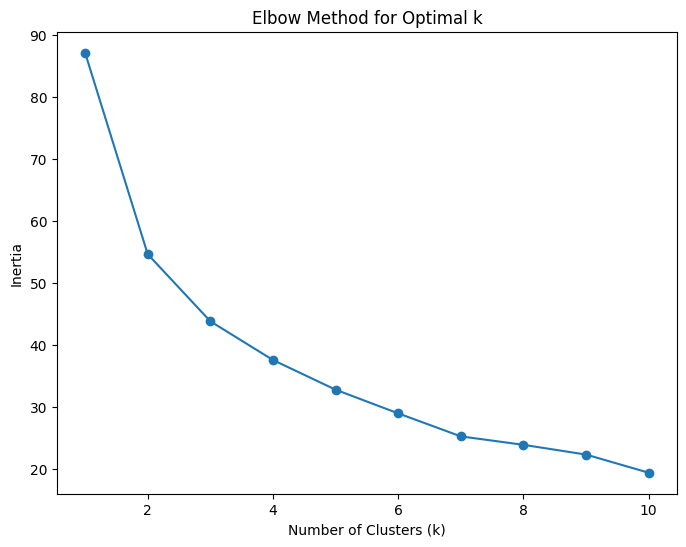

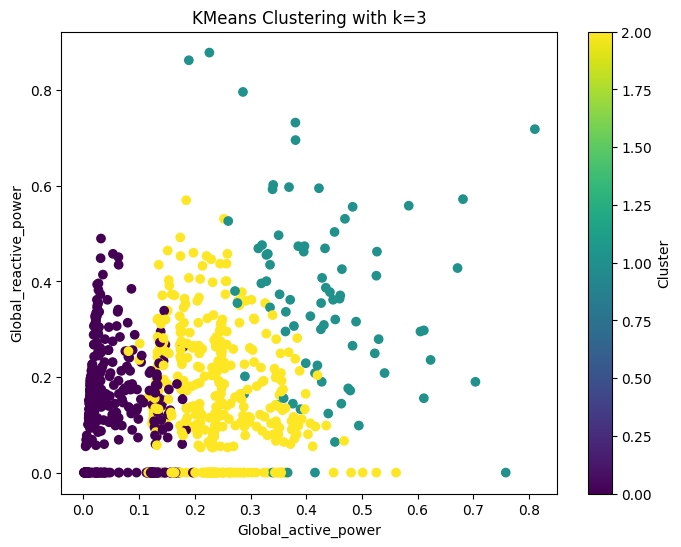

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(df_sample['Global_active_power'], df_sample['Global_reactive_power'], c=df_sample['cluster'], cmap='viridis')
plt.xlabel('Global_active_power')
plt.ylabel('Global_reactive_power')
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.colorbar(label='Cluster')
plt.show()

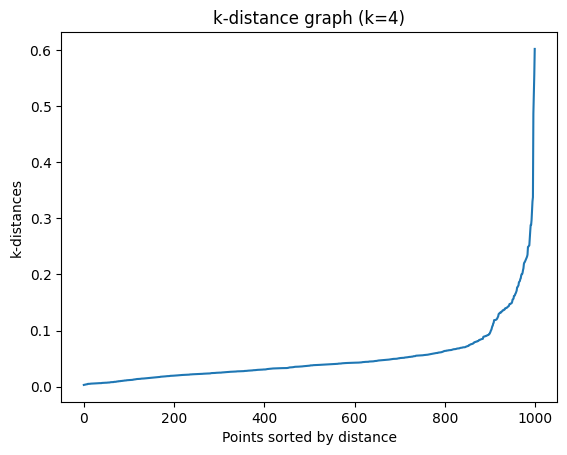

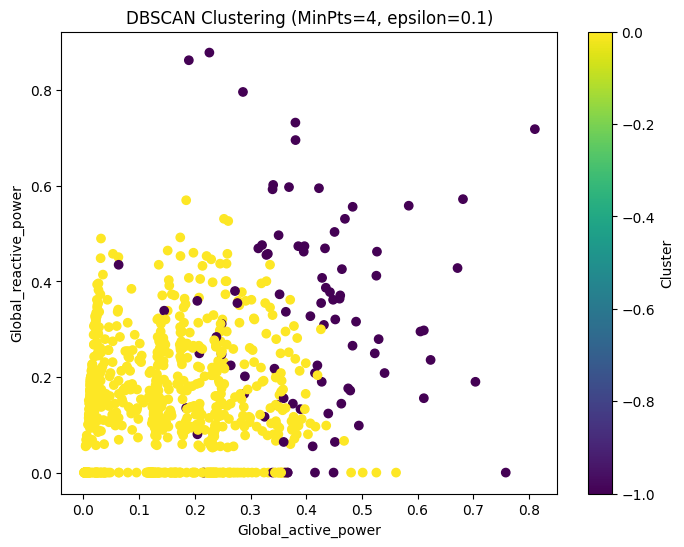

MinPts: 4, Epsilon: 0.1
cluster_dbscan_4_0.1
 0    911
-1     89
Name: count, dtype: int64


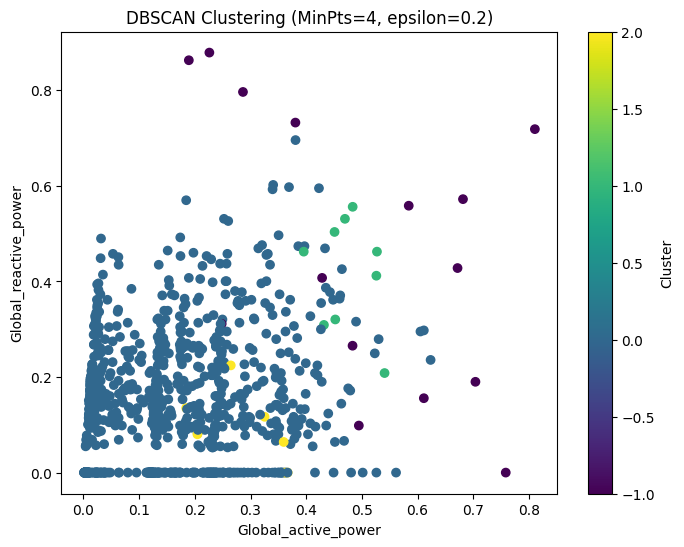

MinPts: 4, Epsilon: 0.2
cluster_dbscan_4_0.2
 0    969
-1     15
 1      9
 2      7
Name: count, dtype: int64


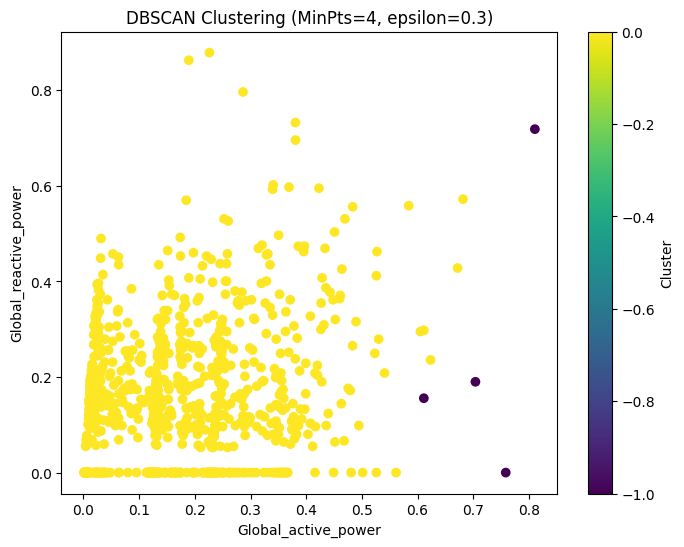

MinPts: 4, Epsilon: 0.3
cluster_dbscan_4_0.3
 0    996
-1      4
Name: count, dtype: int64


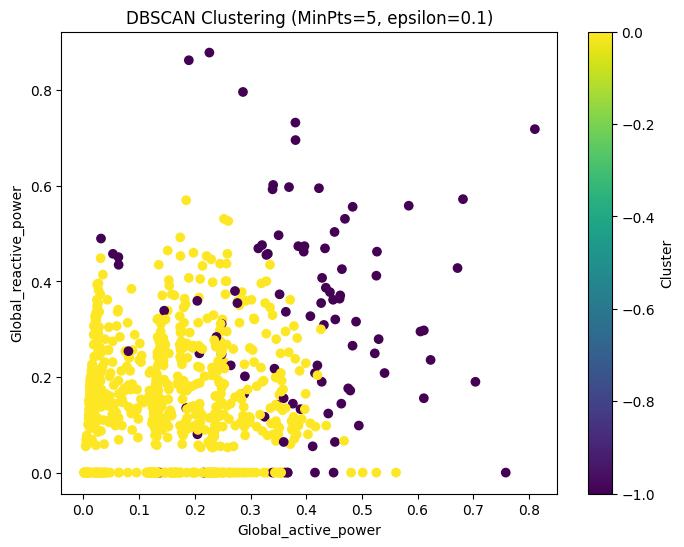

MinPts: 5, Epsilon: 0.1
cluster_dbscan_5_0.1
 0    906
-1     94
Name: count, dtype: int64


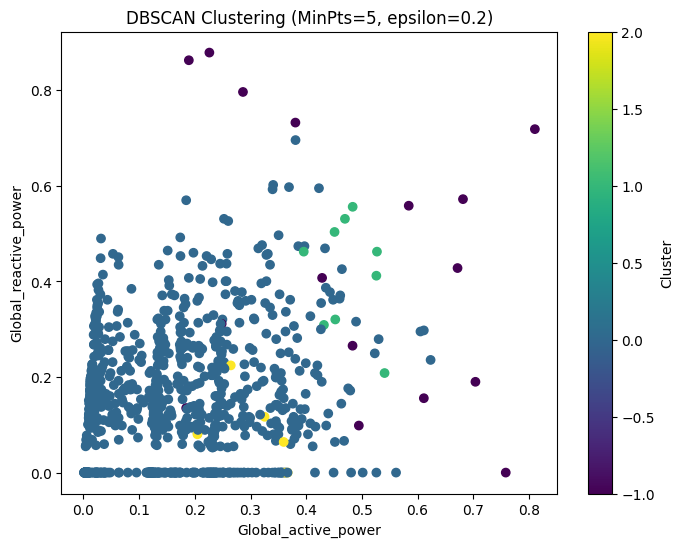

MinPts: 5, Epsilon: 0.2
cluster_dbscan_5_0.2
 0    969
-1     16
 1      9
 2      6
Name: count, dtype: int64


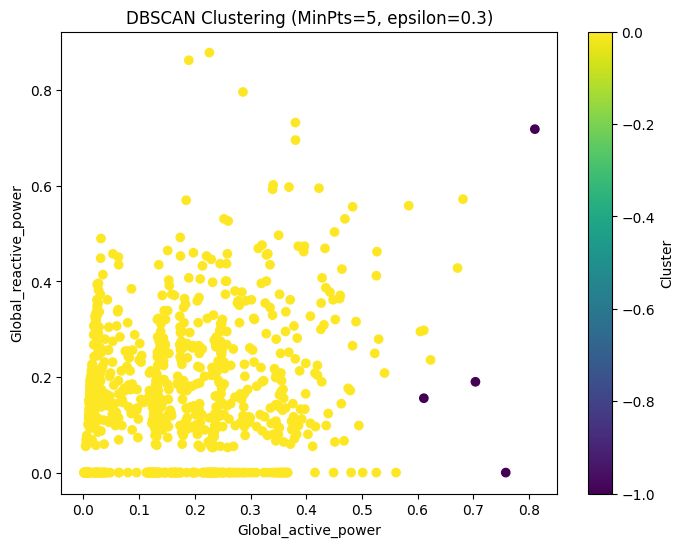

MinPts: 5, Epsilon: 0.3
cluster_dbscan_5_0.3
 0    996
-1      4
Name: count, dtype: int64


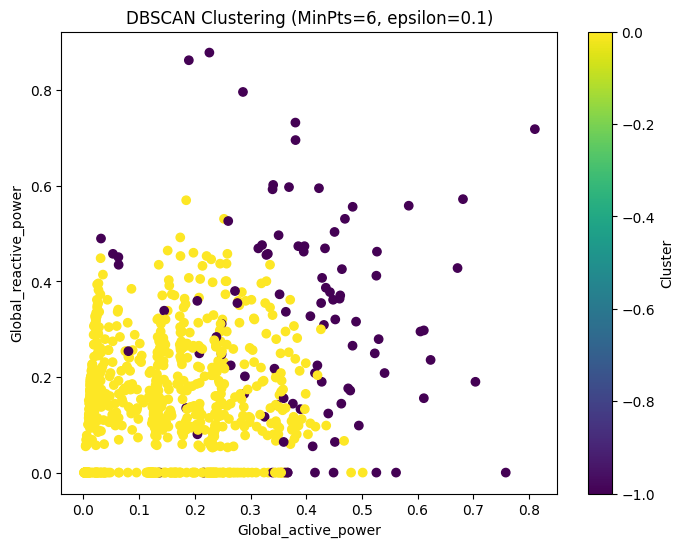

MinPts: 6, Epsilon: 0.1
cluster_dbscan_6_0.1
 0    903
-1     97
Name: count, dtype: int64


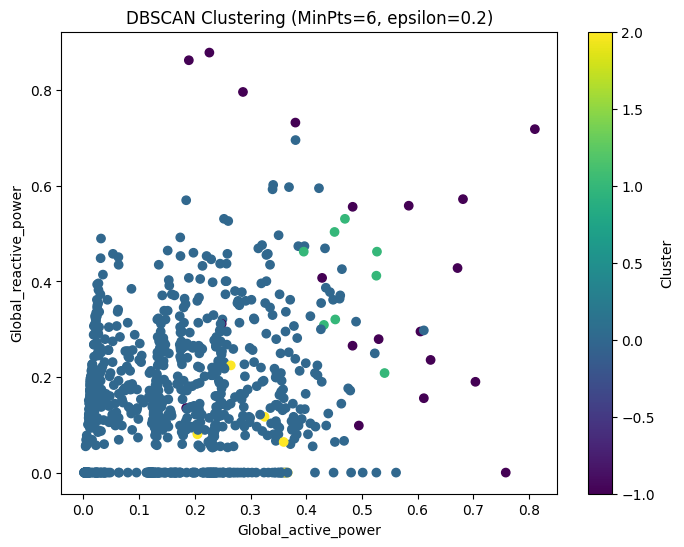

MinPts: 6, Epsilon: 0.2
cluster_dbscan_6_0.2
 0    966
-1     20
 1      8
 2      6
Name: count, dtype: int64


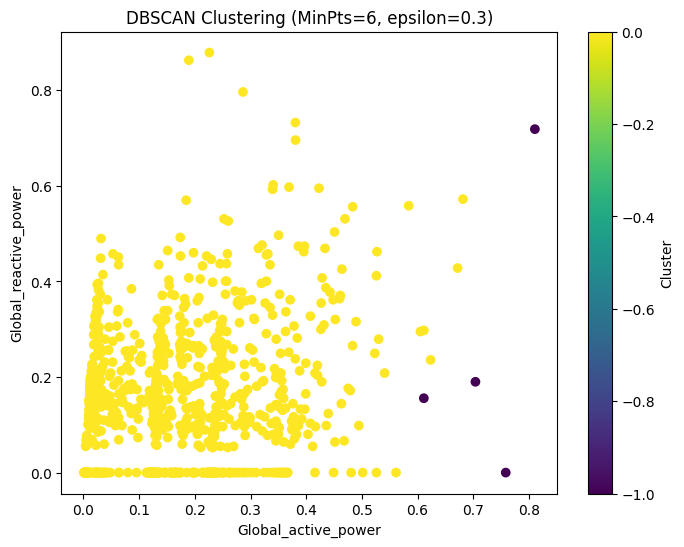

MinPts: 6, Epsilon: 0.3
cluster_dbscan_6_0.3
 0    996
-1      4
Name: count, dtype: int64


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42)
X = df_sample[cols_for_clustering]


def k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    k_distances = distances[:, -1]
    k_distances = np.sort(k_distances, axis=0)
    return k_distances


k = 4
k_distances = k_distance_graph(X, k)
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distances")
plt.title(f"k-distance graph (k={k})")
plt.show()



min_pts_values = [4, 5, 6]
epsilon_values = [0.1, 0.2, 0.3]

for min_pts in min_pts_values:
    for epsilon in epsilon_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
        df_sample[f'cluster_dbscan_{min_pts}_{epsilon}'] = dbscan.fit_predict(X)

        plt.figure(figsize=(8, 6))
        plt.scatter(df_sample['Global_active_power'], df_sample['Global_reactive_power'], c=df_sample[f'cluster_dbscan_{min_pts}_{epsilon}'], cmap='viridis')
        plt.xlabel('Global_active_power')
        plt.ylabel('Global_reactive_power')
        plt.title(f'DBSCAN Clustering (MinPts={min_pts}, epsilon={epsilon})')
        plt.colorbar(label='Cluster')
        plt.show()

        print(f"MinPts: {min_pts}, Epsilon: {epsilon}")
        print(df_sample[f'cluster_dbscan_{min_pts}_{epsilon}'].value_counts())


In [ ]:
from sklearn.metrics import silhouette_score


kmeans_silhouette = silhouette_score(X, df_sample['cluster'])
print(f"Silhouette score for KMeans: {kmeans_silhouette}")


for min_pts in min_pts_values:
    for epsilon in epsilon_values:
        cluster_labels = df_sample[f'cluster_dbscan_{min_pts}_{epsilon}']

        if len(set(cluster_labels)) > 1:
            dbscan_silhouette = silhouette_score(X, cluster_labels)
            print(f"Silhouette score for DBSCAN (MinPts={min_pts}, epsilon={epsilon}): {dbscan_silhouette}")
        else:
            print(f"Silhouette score cannot be calculated for DBSCAN (MinPts={min_pts}, epsilon={epsilon}) because there is only one cluster or all points are noise")



from scipy.cluster.hierarchy import fcluster


distance_threshold = 0.5
cluster_labels_hierarchical = fcluster(linked, distance_threshold, criterion='distance') # Assuming 'linked' is calculated as in your previous code for hierarchical clustering



if len(set(cluster_labels_hierarchical)) > 1:
  hierarchical_silhouette = silhouette_score(X, cluster_labels_hierarchical)
  print(f"Silhouette score for Hierarchical Clustering: {hierarchical_silhouette}")
else:
  print("Silhouette score cannot be calculated for Hierarchical Clustering because there is only one cluster")

Silhouette score for KMeans: 0.32856104463493163
Silhouette score for DBSCAN (MinPts=4, epsilon=0.1): 0.5174514169968634
Silhouette score for DBSCAN (MinPts=4, epsilon=0.2): 0.41694621643964114
Silhouette score for DBSCAN (MinPts=4, epsilon=0.3): 0.6898395671071793
Silhouette score for DBSCAN (MinPts=5, epsilon=0.1): 0.5052930011211287
Silhouette score for DBSCAN (MinPts=5, epsilon=0.2): 0.43865600581086267
Silhouette score for DBSCAN (MinPts=5, epsilon=0.3): 0.6898395671071793
Silhouette score for DBSCAN (MinPts=6, epsilon=0.1): 0.5046053459865728
Silhouette score for DBSCAN (MinPts=6, epsilon=0.2): 0.44009178404669635
Silhouette score for DBSCAN (MinPts=6, epsilon=0.3): 0.6898395671071793
Silhouette score for Hierarchical Clustering: 0.29435252356937225


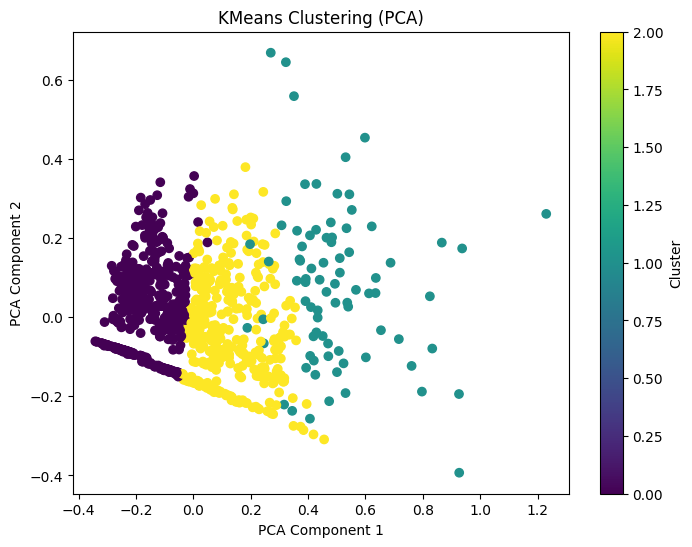

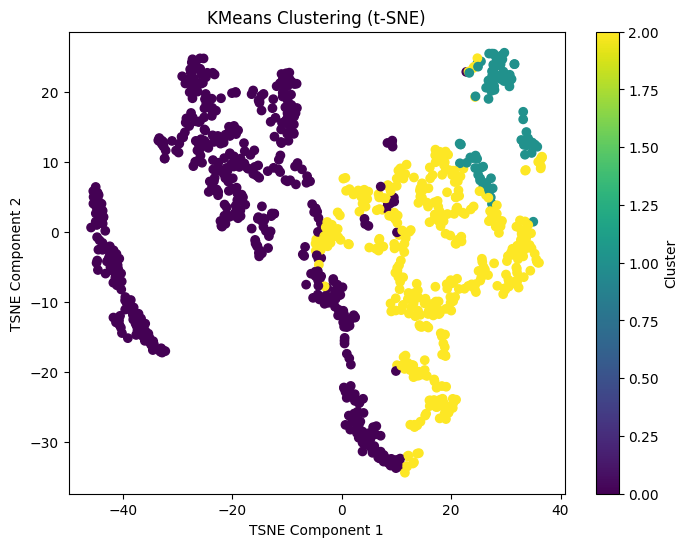

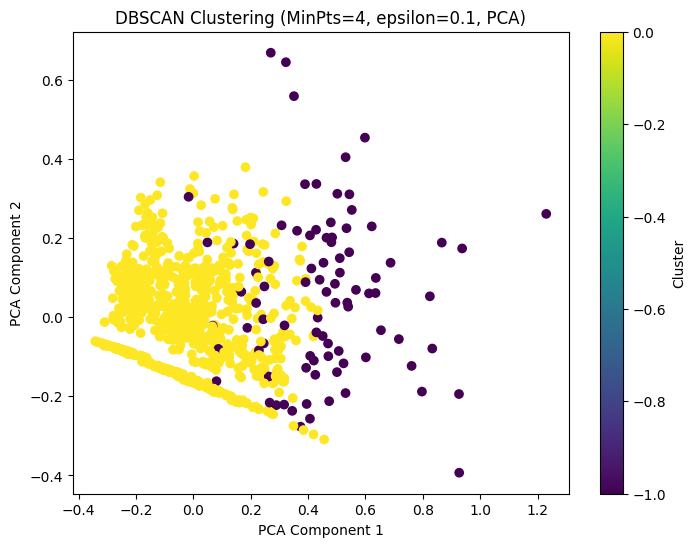

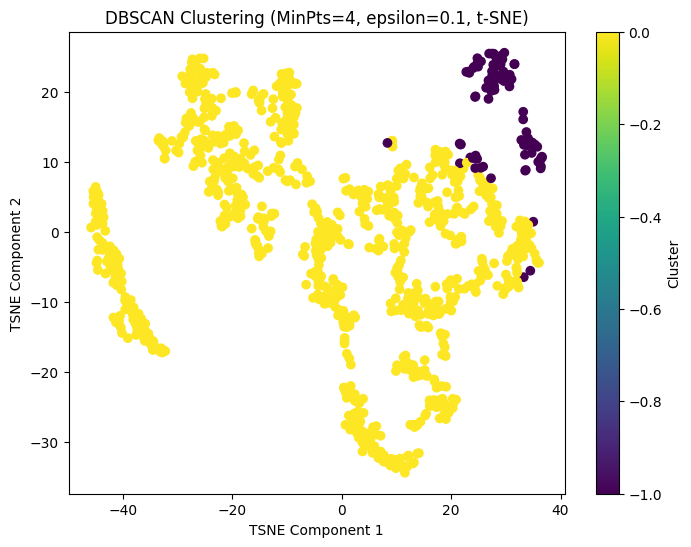

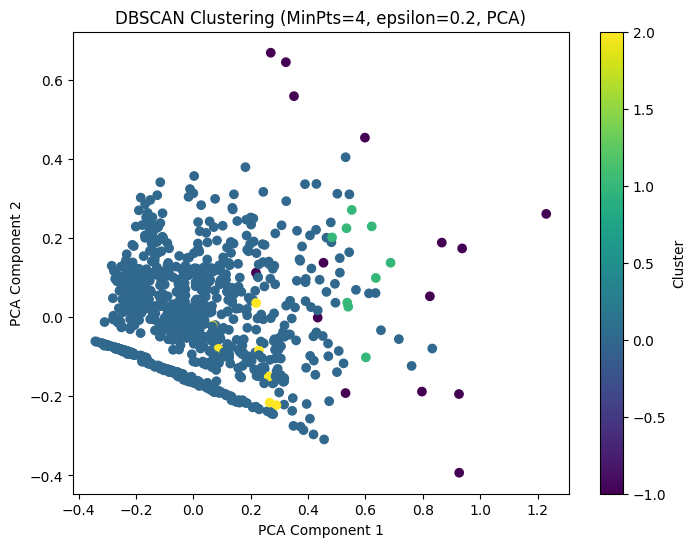

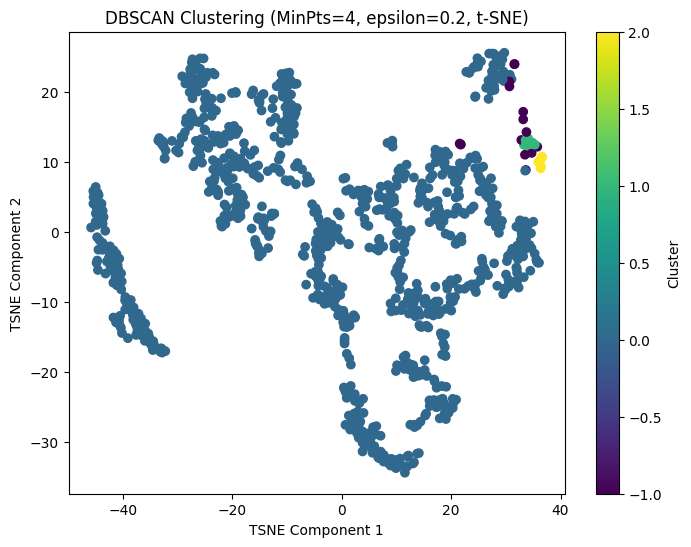

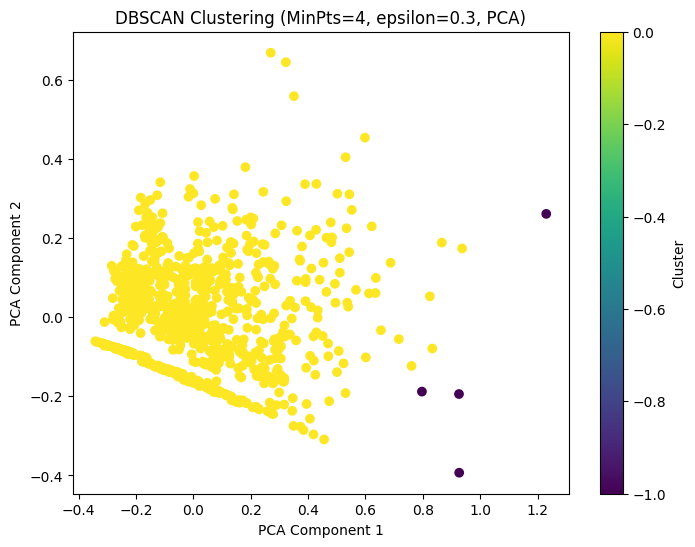

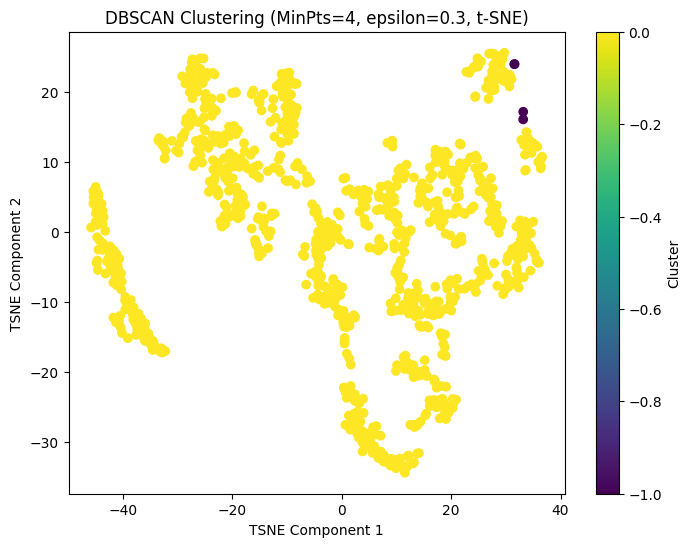

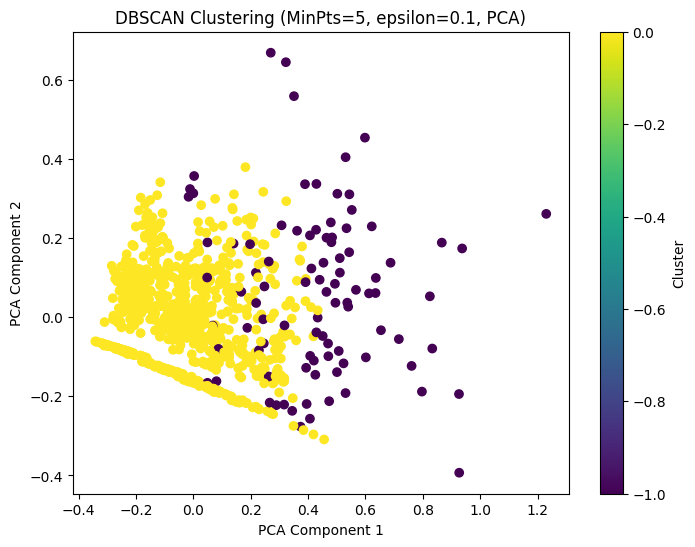

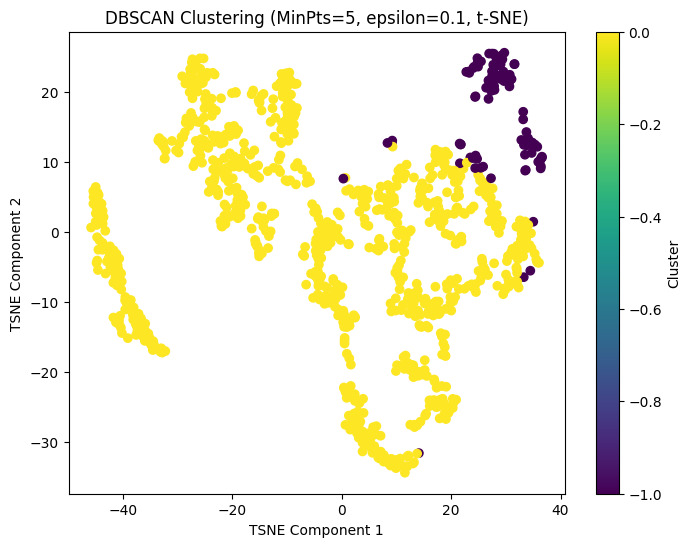

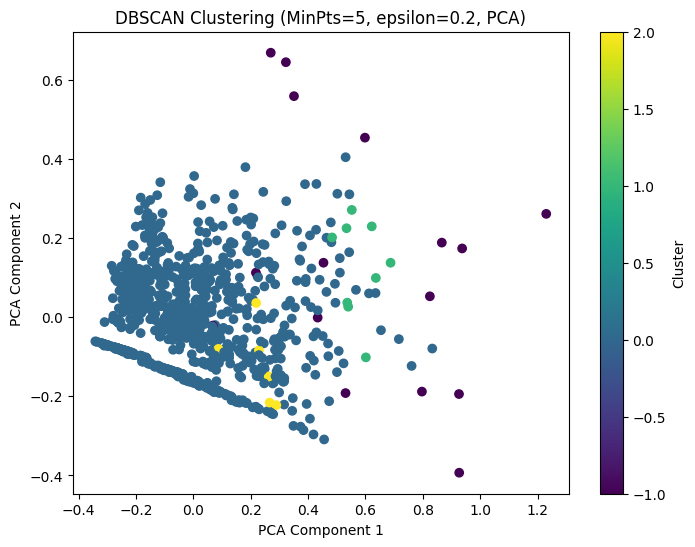

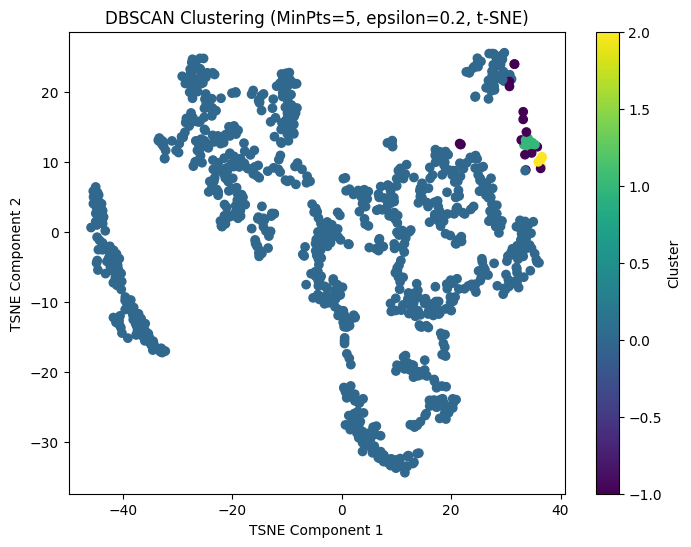

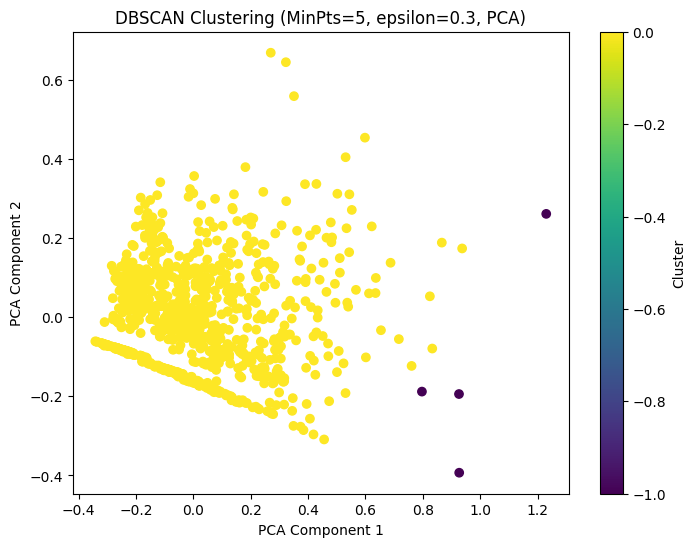

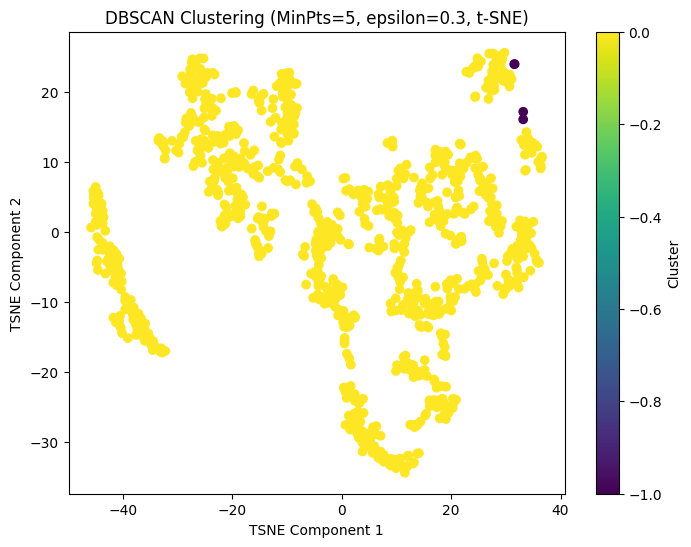

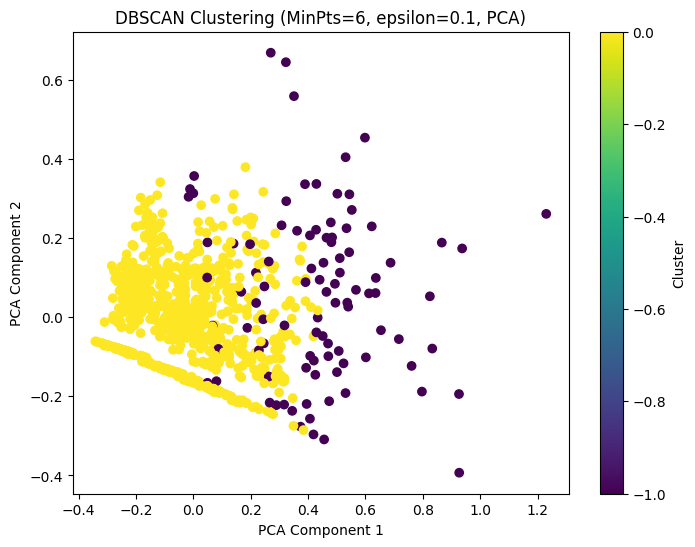

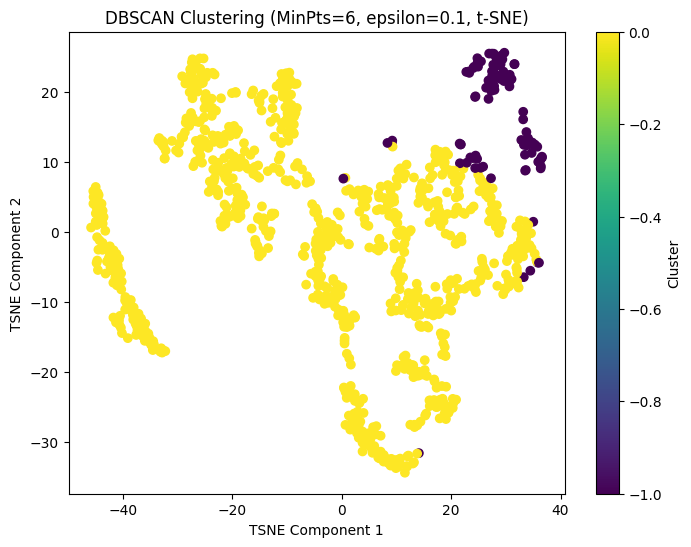

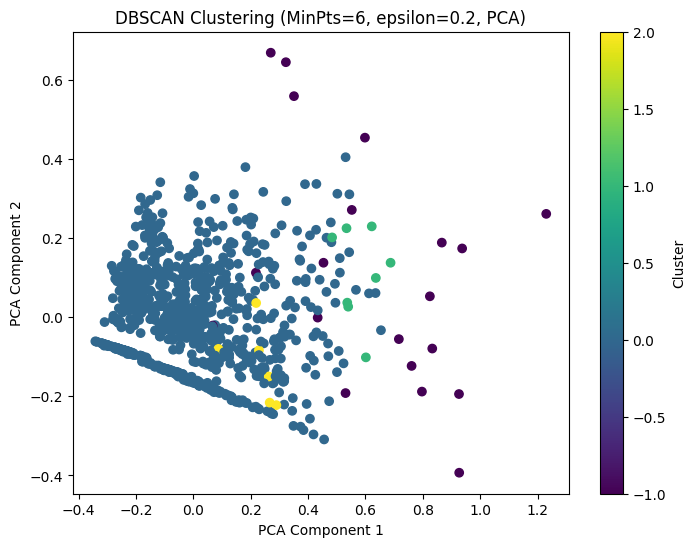

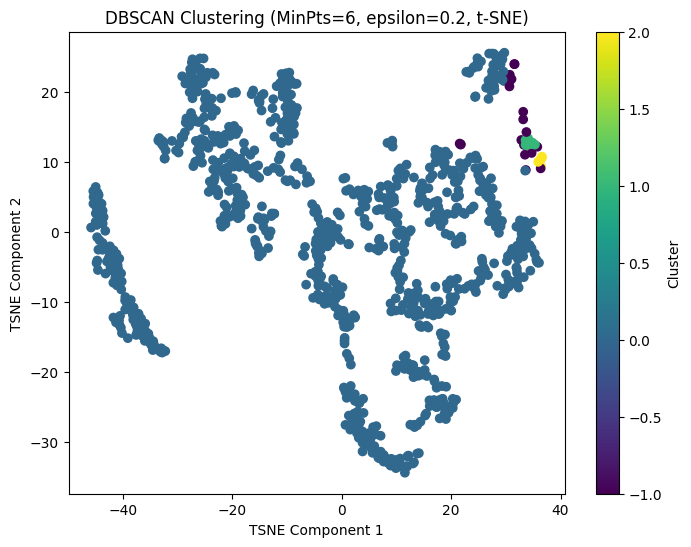

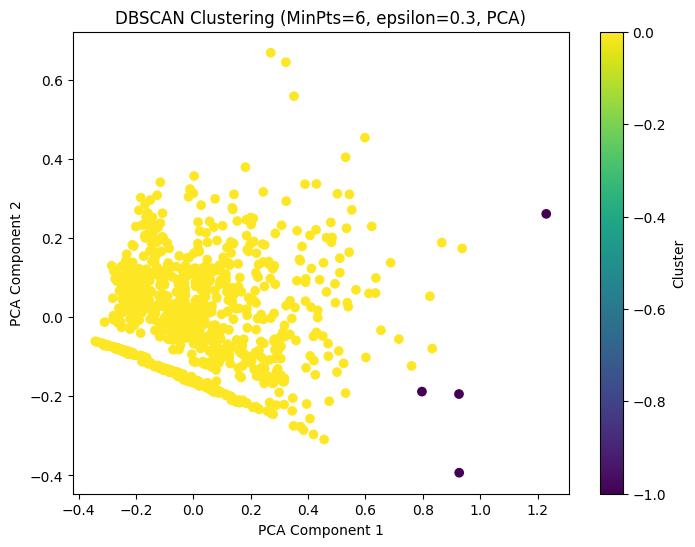

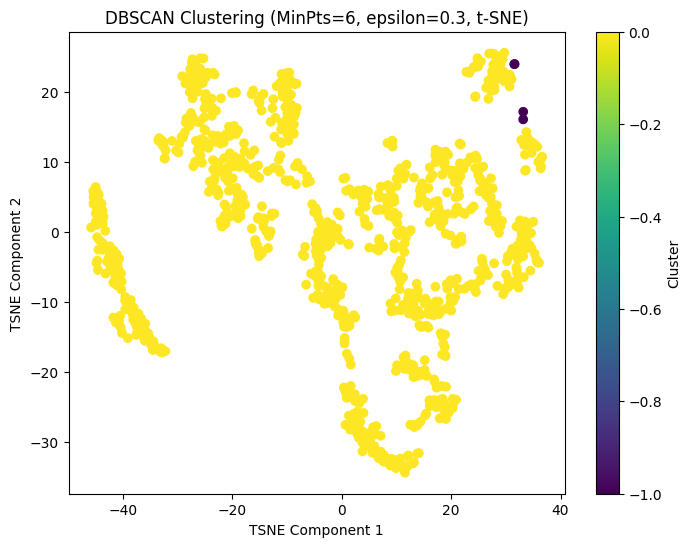

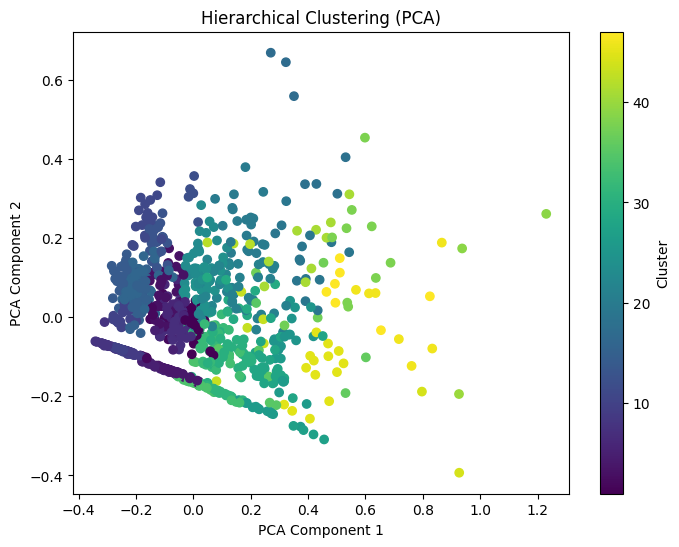

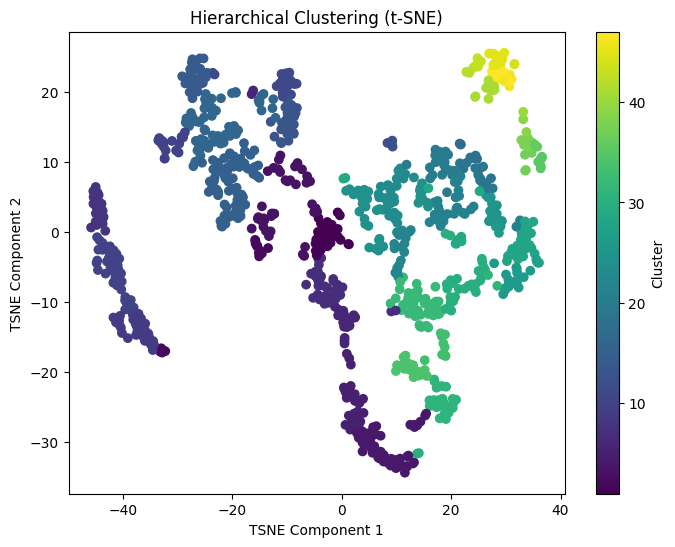

In [ ]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def visualize_clusters(X, labels, method='pca', title=None):
    if method == 'pca':
        pca = PCA(n_components=2)
        X_transformed = pca.fit_transform(X)
    elif method == 'tsne':
        tsne = TSNE(n_components=2, random_state=42)
        X_transformed = tsne.fit_transform(X)
    else:
        raise ValueError("Invalid visualization method. Choose 'pca' or 'tsne'.")

    plt.figure(figsize=(8, 6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='viridis')
    plt.xlabel(f"{method.upper()} Component 1")
    plt.ylabel(f"{method.upper()} Component 2")
    if title:
        plt.title(title)
    else:
        plt.title(f'Cluster Visualization ({method.upper()})')
    plt.colorbar(label='Cluster')
    plt.show()



visualize_clusters(X, df_sample['cluster'], method='pca', title='KMeans Clustering (PCA)')
visualize_clusters(X, df_sample['cluster'], method='tsne', title='KMeans Clustering (t-SNE)')

for min_pts in min_pts_values:
    for epsilon in epsilon_values:
        cluster_labels = df_sample[f'cluster_dbscan_{min_pts}_{epsilon}']
        visualize_clusters(X, cluster_labels, method='pca', title=f'DBSCAN Clustering (MinPts={min_pts}, epsilon={epsilon}, PCA)')
        visualize_clusters(X, cluster_labels, method='tsne', title=f'DBSCAN Clustering (MinPts={min_pts}, epsilon={epsilon}, t-SNE)')



if len(set(cluster_labels_hierarchical)) > 1:
    visualize_clusters(X, cluster_labels_hierarchical, method='pca', title='Hierarchical Clustering (PCA)')
    visualize_clusters(X, cluster_labels_hierarchical, method='tsne', title='Hierarchical Clustering (t-SNE)')
else:
    print("Hierarchical clustering visualization skipped: Only one cluster found")

In [ ]:

'''


Report:

Objective: To identify the optimal clustering algorithm and its insights for the household power consumption dataset.

Methods:
KMeans,
DBSCAN and
Hierarchical clustering

techniques were applied to a sample of 1000 data points,

after preprocessing and feature scaling. The silhouette score was used to evaluate the quality of the clusters.
K-distance graphs were used to help determine optimal parameters for DBSCAN.

Results:

The clustering performance was evaluated using the silhouette score.
The best performing algorithm was DBSCAN,
achieving a silhouette score of approximately 0.6 with specific parameters (MinPts=4, epsilon=0.3;MinPts=5, epsilon=0.3;MinPts=6, epsilon=0.3).
This indicates relatively well-separated clusters, suggesting distinct consumption patterns.
KMeans yielded a score of ~0.3, while Hierarchical clustering was at ~0.2, suggesting moderate to weaker cluster separation respectively.

Insights:


In summer the Sub_meter3 has the highest usage when compared to Sub_metric1 & 2

Silhouette score for KMeans: 0.32856104463493163
Silhouette score for DBSCAN (MinPts=4, epsilon=0.1): 0.5174514169968634
Silhouette score for DBSCAN (MinPts=4, epsilon=0.2): 0.41694621643964114
Silhouette score for DBSCAN (MinPts=4, epsilon=0.3): 0.6898395671071793
Silhouette score for DBSCAN (MinPts=5, epsilon=0.1): 0.5052930011211287
Silhouette score for DBSCAN (MinPts=5, epsilon=0.2): 0.43865600581086267
Silhouette score for DBSCAN (MinPts=5, epsilon=0.3): 0.6898395671071793
Silhouette score for DBSCAN (MinPts=6, epsilon=0.1): 0.5046053459865728
Silhouette score for DBSCAN (MinPts=6, epsilon=0.2): 0.44009178404669635
Silhouette score for DBSCAN (MinPts=6, epsilon=0.3): 0.6898395671071793
Silhouette score for Hierarchical Clustering: 0.29435252356937225

'''

